In [43]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.figure(figsize=(10,6))

%matplotlib inline

# Gather the dataset
# Source of dataset - https://www.kaggle.com/datasets/rakeshrau/social-network-ads

# load data set using pandas read CSV method
# Save data set in variable called data
data = pd.read_csv('Social_Network_Ads.csv')
# Call the head method
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


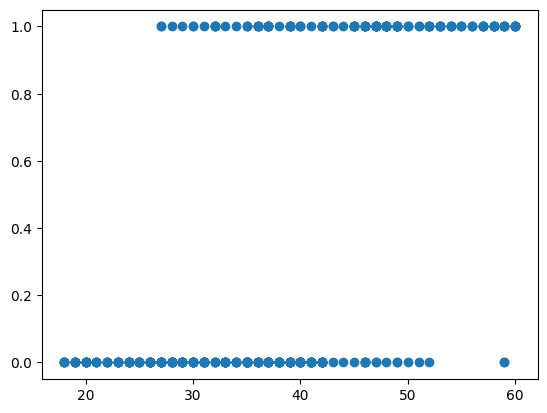

In [44]:
# Visualize data set
# Plotting a scatter plot
# Plot Age versus Purchased
# Label X and y axis
# increase size of visualization
plt.scatter(data['Age'], data['Purchased'])
plt.show()

# Divide the data to training set and test set
# Use Train, test, split method 
# Apply to x and y defined previously
# Pass the optional parameter known as test size default from 75% training and 25% testing
# Instead use 80% of data for training and 20% of data for testing 
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size=0.2)

In [45]:
# Create logistic regression model

# function to normalize
def normalize(X):
    return X - X.mean()

# Method used to make predictions
# Converted into Numpy array
def predict (X, b0, b1):
    return np.array([1 / (1 + exp(-1 * b0 + -1 * b1 * x)) for x in X])

# Implement a logical algorithm
# Run test 150 times, define epochs
# Make a prediction
# name our variable Y pred
# Directly find values of the partial derivatives 
# name derivative of the loss function to b0 as D_b0
# name derivative of the loss function to b1 as D_b1
# Covert equations into code
# Update the values of b0 and b1
# Return the values of b0 and b1
def logistic_regression(X, Y):
    
    X = normalize(X)
    
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 150 
    
    for epoch in range(epochs) : 
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y -y_pred) * y_pred * (1 - y_pred))
        D_b1 = -2 * sum((Y -y_pred) * y_pred * (1 - y_pred) * X)
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
        
    return b0, b1

        

In [46]:
# Train the model using our training data
b0, b1 = logistic_regression(X_train, y_train)
print(b0, b1)

-0.9347558929520066 0.1885429604378133


Accuracy = 0.625


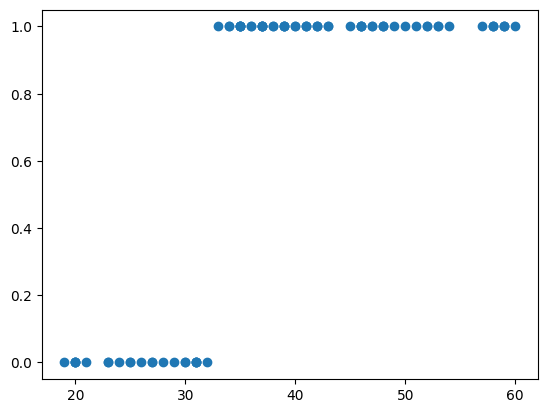

In [54]:
# Normalize the values of the testing values of X
# Predict the values
# Check the value of y_pred
# Define threshold of 0.5 with if else

X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [ 1 if y >= 0.1 else 0 for y in y_pred]

# Plot and Check
plt.scatter(X_test, y_pred)

# Find the accuracy 
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
    
print(f"Accuracy = {accuracy / len(y_pred)}")
    
# Accuracy is 62.5%

C:\Users\ashem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


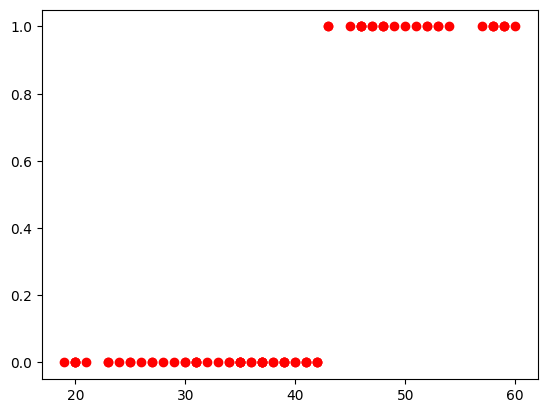

Accuracy = 0.8375


In [52]:
# Implament same algorithm using SQL library
# prediction using scikit learn
from sklearn.linear_model import LogisticRegression

# Create instance and fit the model
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

# Make a prediction
y_pred_sk = lr_model.predict(X_test.values.reshape(-1, 1))

# Plot and find accuracy
plt.clf()
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()

#Accuracy
print(f"Accuracy = {lr_model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))}")
# Accuracy is 83.75%